In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

import numpy as np
import matplotlib.pyplot as plt

/home/act65/anaconda3/envs/mri/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from src.vae import *
from src.utils import input_fn

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/MNIST_data/", one_hot=False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /tmp/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
params = {}
params['activation'] = tf.keras.layers.LeakyReLU()
params['latent_size'] = 16
params['base_depth'] = 32
params['mixture_components'] = 100
params['n_samples'] = 16

In [5]:
batch_size=1000

In [6]:
features = tf.placeholder(shape=[None, 28, 28, 1], dtype=tf.float32) 
features = tf.round(features)

In [6]:
encoder = make_encoder(params["activation"],
                     params["latent_size"],
                     params["base_depth"])
decoder = make_decoder(params["activation"],
                     params["latent_size"],
                     IMAGE_SHAPE,
                     params["base_depth"])
latent_prior = make_mixture_prior(params["latent_size"],
                                params["mixture_components"])

In [8]:
# reconstruction
approx_posterior = encoder(features)
approx_posterior_sample = approx_posterior.sample()
decoder_likelihood = decoder(approx_posterior_sample)
recons = decoder_likelihood.sample()

/home/act65/anaconda3/envs/mri/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/home/act65/anaconda3/envs/mri/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/home/act65/anaconda3/envs/mri/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/home/act65/anaconda3/envs/mri/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/home/act65/anaconda

In [7]:
model_dir = '/media/act65/640a4914-fb27-4b69-acc6-2a2d569c900b/vae/0'
saver = tf.train.Saver()

In [10]:
batch_size = 20000

INFO:tensorflow:Restoring parameters from /media/act65/640a4914-fb27-4b69-acc6-2a2d569c900b/vae/0/model.ckpt-3500


(-4.372036910783432, 4.8324820764175875, -4.431957870796378, 5.493630081489737)

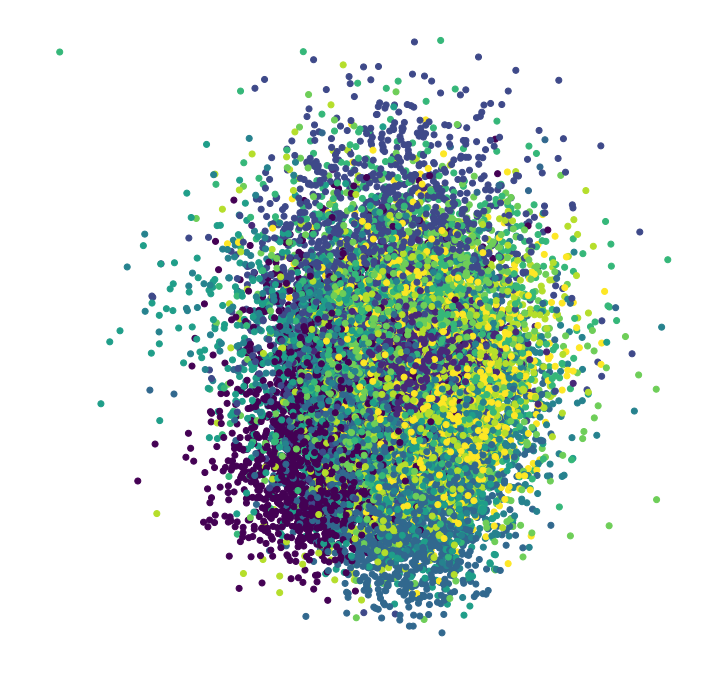

In [11]:
h = approx_posterior.mean()

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(model_dir))
    H = sess.run(h, feed_dict={features: mnist.train.images[0:batch_size, ...].reshape((batch_size, 28, 28, 1))})
    
H.shape
plt.figure(figsize=(12,12))
plt.scatter(H[:, 0], H[:, 1], c=mnist.train.labels[0:batch_size])
plt.axis('off')

In [12]:
batch_size = 10


INFO:tensorflow:Restoring parameters from /media/act65/640a4914-fb27-4b69-acc6-2a2d569c900b/vae/0/model.ckpt-3500


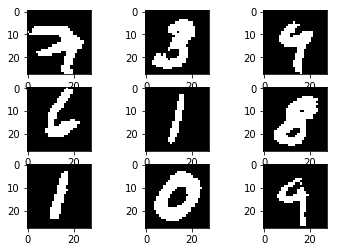

In [13]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(model_dir))
    R = sess.run(recons, feed_dict={features: 
        mnist.train.images[0:batch_size, ...].reshape((batch_size, 28, 28, 1))})
    
plt.figure()
for i in range(batch_size-1):
    plt.subplot(3,3,i+1)
    plt.imshow(R[i, :, :, 0], cmap='gray')

In [14]:
# generate
z = latent_prior.sample(batch_size)
decoder_likelihood = decoder(z)
g = decoder_likelihood.sample()

/home/act65/anaconda3/envs/mri/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/home/act65/anaconda3/envs/mri/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/home/act65/anaconda3/envs/mri/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/home/act65/anaconda3/envs/mri/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/home/act65/anaconda

INFO:tensorflow:Restoring parameters from /media/act65/640a4914-fb27-4b69-acc6-2a2d569c900b/vae/0/model.ckpt-3500


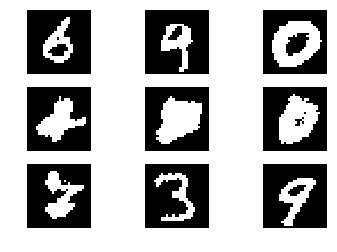

In [15]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(model_dir))
    G = sess.run(g)
    
plt.figure()
for i in range(batch_size-1):
    plt.subplot(3,3,i+1)
    plt.imshow(G[i, :, :, 0], cmap='gray')
    plt.axis('off')

In [37]:
batch_size = 5

In [38]:
images = tf.constant(mnist.train.images[0:batch_size, ...].reshape((batch_size, 28, 28, 1)))

In [40]:
# randomly init a new image
x = 0.1*tf.random_normal([batch_size, 28, 28, 1]) + images
# x = tf.random_uniform(minval=0, maxval=2, shape=[10, 28, 28, 1], dtype=tf.int32)
x = tf.cast(x, tf.float32)
x = tf.Variable(x)

# push it though the encoder and 
# approx_posterior = encoder(x)
# approx_posterior_sample = approx_posterior.sample(100)
# log_p = latent_prior.log_prob(approx_posterior_sample)

# push it though the encoder and 
n_samples = 256
z_sample = tf.reshape(latent_prior.sample(n_samples*batch_size), [n_samples, batch_size, 16])
decoder_likelihood = decoder(z_sample)
log_p = decoder_likelihood.log_prob(x)

loss = -tf.reduce_mean(log_p)
with tf.variable_scope('opt') as scope:
    step = tf.train.AdamOptimizer(0.01).minimize(loss, var_list=[x])
variables = tf.get_collection(key=tf.GraphKeys.GLOBAL_VARIABLES, scope='opt')

/home/act65/anaconda3/envs/mri/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/home/act65/anaconda3/envs/mri/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/home/act65/anaconda3/envs/mri/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/home/act65/anaconda3/envs/mri/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/home/act65/anaconda

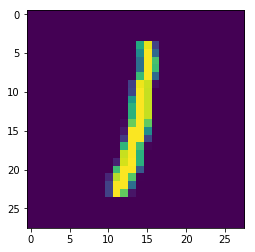

In [41]:
with tf.Session() as sess:
    X = sess.run(images)
for i in range(batch_size):
    plt.imshow(X[i, :, :, 0])

INFO:tensorflow:Restoring parameters from /media/act65/640a4914-fb27-4b69-acc6-2a2d569c900b/vae/0/model.ckpt-3500
9

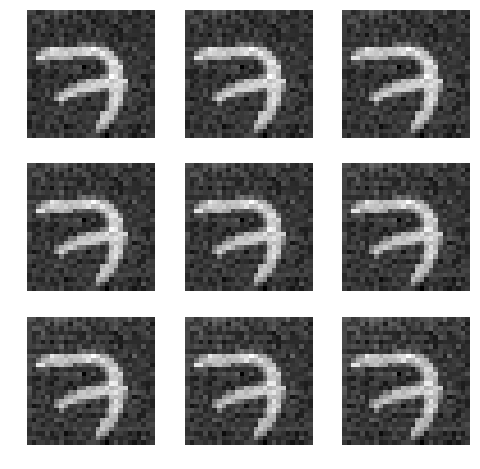

In [42]:
probs = []
iterations = 100
plt.figure(figsize=(8, 8))
counter = 0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint(model_dir))
    for i in range(iterations):
        X, _, P = sess.run([x, step, log_p])
        probs.append(P)
        if i % iterations//10 == 0:
            print('\r{}'.format(counter), end='', flush=True)
            counter += 1
            if counter < 10:
                plt.subplot(3,3, counter)
                plt.imshow(X[0, :, :, 0], cmap='gray')
                plt.axis('off')

Text(0.5,1,'Maximise the density, P(x)')

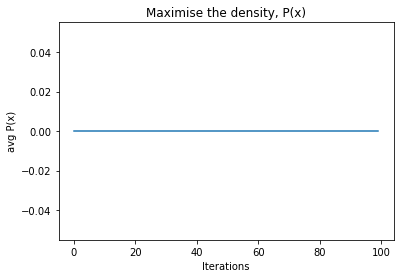

In [26]:
plt.plot([np.mean(np.exp(p)) for p in probs])
plt.xlabel('Iterations')
plt.ylabel('avg P(x)')
plt.title('Maximise the density, P(x)')